<img src="https://www.projectcubicle.com/wp-content/uploads/2022/04/Ethical-Problem-of-Artificial-Intelligence-4.jpg"><br>
# <center> Utilizando a inteligência artificial para prever preços de ações </center>

## Introdução<br>
Este estudo tem o objetivo de utilizar técnicas de *machine learning* para prever o preço de fechamento das ações da Petrobrás através de técnicas de regressão linear.<br>
A biblioteca utilizada neste estudo é a <a href="https://pycaret.org/">PyCaret</a>, biblioteca *low-code* de machine learning que pode ser usada em Python para automatizar o processo de criação de modelos.

## Importando Bibliotecas

In [59]:
import pandas as pd, yfinance as yf, plotly.express as px
# Importando plotly.io e fazendo configurações para visualizar gráficos do plotly no GitHub
import plotly.io as pio
pio.renderers.default = "svg"

## Obtendo e tratando os dados

In [2]:
# Extraindo dados das ações da Petrobrás
df = yf.Ticker('PETR4.SA')
# Definindo o período para análise (10 anos)
petr4 = df.history(period='10y')
petr4

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2012-06-06,10.841078,10.994731,10.789860,10.863842,28549100,0.0,0
2012-06-08,10.841079,10.926443,10.619136,10.744334,22183800,0.0,0
2012-06-11,10.875222,10.920749,10.465480,10.465480,23041400,0.0,0
2012-06-12,10.499626,10.624824,10.425644,10.584989,24582800,0.0,0
2012-06-13,10.545152,10.767095,10.471171,10.755713,27915700,0.0,0
...,...,...,...,...,...,...,...
2022-05-31,30.410000,30.620001,29.809999,30.059999,83598000,0.0,0
2022-06-01,29.900000,30.330000,29.850000,30.020000,46353200,0.0,0
2022-06-02,29.969999,30.049999,29.549999,29.760000,50738300,0.0,0


In [3]:
# Removendo colunas que não serão utilizadas
petr4 = petr4.drop(['Dividends','Stock Splits'], axis=1)
petr4

,Open,High,Low,Close,Volume
Date,,,,,
2012-06-06,10.841078,10.994731,10.789860,10.863842,28549100
2012-06-08,10.841079,10.926443,10.619136,10.744334,22183800
2012-06-11,10.875222,10.920749,10.465480,10.465480,23041400
2012-06-12,10.499626,10.624824,10.425644,10.584989,24582800
2012-06-13,10.545152,10.767095,10.471171,10.755713,27915700
...,...,...,...,...,...
2022-05-31,30.410000,30.620001,29.809999,30.059999,83598000
2022-06-01,29.900000,30.330000,29.850000,30.020000,46353200
2022-06-02,29.969999,30.049999,29.549999,29.760000,50738300


In [4]:
# Adicionando Médias Móveis para acrescentar mais features ao modelo
petr4['SMA7'] = petr4.Close.rolling(window=7).mean().round(2)
petr4['SMA30'] = petr4.Close.rolling(window=30).mean().round(2)
petr4

,Open,High,Low,Close,Volume,SMA7,SMA30
Date,,,,,,,
2012-06-06,10.841078,10.994731,10.789860,10.863842,28549100,NaN,NaN
2012-06-08,10.841079,10.926443,10.619136,10.744334,22183800,NaN,NaN
2012-06-11,10.875222,10.920749,10.465480,10.465480,23041400,NaN,NaN
2012-06-12,10.499626,10.624824,10.425644,10.584989,24582800,NaN,NaN
2012-06-13,10.545152,10.767095,10.471171,10.755713,27915700,NaN,NaN
...,...,...,...,...,...,...,...
2022-05-31,30.410000,30.620001,29.809999,30.059999,83598000,31.27,29.43
2022-06-01,29.900000,30.330000,29.850000,30.020000,46353200,30.92,29.48
2022-06-02,29.969999,30.049999,29.549999,29.760000,50738300,30.66,29.52


Observe que os dados extraídos contém o preço de abertura, o preço máximo do dia, o preço mínimo do dia, o fechamento e o volume financeiro negociado naquele determinado dia. Após criarmos as colunas que realizam o cálculo das médias móveis, temos também a média móvel dos últimos 7 e 30 dias de acordo com cada pregão analisado.<br>
Os dados extraídos são do dia **06 de Junho de 2012** até **06 de Junho de 2022**.

In [5]:
# Retirando os últimos 253 dias de pregão (cerca de 1 ano) para testar a previsão
petr4_predict = petr4.tail(253)
petr4_predict

,Open,High,Low,Close,Volume,SMA7,SMA30
Date,,,,,,,
2021-06-01,18.882434,19.089176,18.613670,18.806629,90744900,18.25,17.22
2021-06-02,18.847976,19.344157,18.785954,19.206329,103985100,18.40,17.31
2021-06-04,19.337264,19.723183,19.240785,19.640486,102757300,18.66,17.42
2021-06-07,19.640488,19.674945,19.302810,19.495770,74548900,18.87,17.53
2021-06-08,19.413069,19.847227,19.268349,19.750748,88398600,19.15,17.64
...,...,...,...,...,...,...,...
2022-05-31,30.410000,30.620001,29.809999,30.059999,83598000,31.27,29.43
2022-06-01,29.900000,30.330000,29.850000,30.020000,46353200,30.92,29.48
2022-06-02,29.969999,30.049999,29.549999,29.760000,50738300,30.66,29.52


Criamos um novo *dataframe* contendo os últimos 253 dias de pregão (de 01 de Junho de 2021 até 06 de Junho de 2022) para fazermos um teste do nosso modelo de previsão posteriormente.

In [6]:
# Removendo os últimos 253 dias do dataframe original
petr4.drop(petr4.tail(253).index, inplace=True)
petr4

,Open,High,Low,Close,Volume,SMA7,SMA30
Date,,,,,,,
2012-06-06,10.841078,10.994731,10.789860,10.863842,28549100,NaN,NaN
2012-06-08,10.841079,10.926443,10.619136,10.744334,22183800,NaN,NaN
2012-06-11,10.875222,10.920749,10.465480,10.465480,23041400,NaN,NaN
2012-06-12,10.499626,10.624824,10.425644,10.584989,24582800,NaN,NaN
2012-06-13,10.545152,10.767095,10.471171,10.755713,27915700,NaN,NaN
...,...,...,...,...,...,...,...
2021-05-25,18.248424,18.344905,17.766027,17.807375,63672000,18.04,16.85
2021-05-26,17.855615,18.041683,17.676438,17.979660,46646900,17.99,16.92
2021-05-27,17.972768,18.089921,17.759135,17.855614,48877800,17.94,16.97


In [7]:
# Removendo dados nulos
petr4.dropna(inplace=True)
petr4

,Open,High,Low,Close,Volume,SMA7,SMA30
Date,,,,,,,
2012-07-19,11.000421,11.250819,11.000421,11.165457,20781700,10.93,10.71
2012-07-20,11.028874,11.131309,10.875221,10.915057,19025100,10.98,10.72
2012-07-23,10.738643,10.835388,10.476863,10.789860,21365500,11.01,10.72
2012-07-24,10.841077,10.926441,10.602062,10.693116,19547500,10.95,10.72
2012-07-25,10.812622,10.932129,10.670351,10.812622,17749100,10.90,10.73
...,...,...,...,...,...,...,...
2021-05-25,18.248424,18.344905,17.766027,17.807375,63672000,18.04,16.85
2021-05-26,17.855615,18.041683,17.676438,17.979660,46646900,17.99,16.92
2021-05-27,17.972768,18.089921,17.759135,17.855614,48877800,17.94,16.97


In [8]:
# Removendo índices
petr4.reset_index(drop=True, inplace=True)
petr4_predict.reset_index(drop=True, inplace=True)

In [10]:
# Visualizando dataframe
petr4

,Open,High,Low,Close,Volume,SMA7,SMA30
0,11.000421,11.250819,11.000421,11.165457,20781700,10.93,10.71
1,11.028874,11.131309,10.875221,10.915057,19025100,10.98,10.72
2,10.738643,10.835388,10.476863,10.789860,21365500,11.01,10.72
3,10.841077,10.926441,10.602062,10.693116,19547500,10.95,10.72
4,10.812622,10.932129,10.670351,10.812622,17749100,10.90,10.73
...,...,...,...,...,...,...,...
2193,18.248424,18.344905,17.766027,17.807375,63672000,18.04,16.85
2194,17.855615,18.041683,17.676438,17.979660,46646900,17.99,16.92
2195,17.972768,18.089921,17.759135,17.855614,48877800,17.94,16.97
2196,18.055466,18.620561,18.021008,18.599886,129526400,18.03,17.06


In [14]:
# Visualizando correlações entre as variáveis
petr4.corr()

,Open,High,Low,Close,Volume,SMA7,SMA30
Open,1.000000,0.999198,0.998981,0.998116,0.086853,0.995113,0.963394
High,0.999198,1.000000,0.998686,0.999015,0.100695,0.994921,0.964153
Low,0.998981,0.998686,1.000000,0.999137,0.070257,0.993589,0.959956
Close,0.998116,0.999015,0.999137,1.000000,0.084603,0.993487,0.961030
Volume,0.086853,0.100695,0.070257,0.084603,1.000000,0.102619,0.135411
SMA7,0.995113,0.994921,0.993589,0.993487,0.102619,1.000000,0.975141
SMA30,0.963394,0.964153,0.959956,0.961030,0.135411,0.975141,1.000000


Analisando as correlações acima, podemos perceber que os preços de abertura, máximo, mínimo, fechamento e as médias móveis apresentam fortes correlações entre si.

## Utilizando o PyCaret para criar um modelo de Machine Learning para prever os preços de fechamento

In [13]:
# Importando biblioteca de regressão do Pycaret
from pycaret.regression import *
# Configurando o Pycaret para receber nossos dados para modelagem
# Session_id para reproduzir as mesmas informações
# remove_perfect_collinearity => Não remover colunas com alta correlação
setup(data = petr4, target = 'Close', session_id=123, remove_perfect_collinearity = False)

,Description,Value
0,session_id,123
1,Target,Close
2,Original Data,"(2198, 7)"
3,Missing Values,False
4,Numeric Features,6
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(1538, 6)"


(False,
 {'mae': <pycaret.containers.metrics.regression.MAEMetricContainer at 0x1f420c1fbb0>,
  'mse': <pycaret.containers.metrics.regression.MSEMetricContainer at 0x1f420c1fdf0>,
  'rmse': <pycaret.containers.metrics.regression.RMSEMetricContainer at 0x1f420c1ff70>,
  'r2': <pycaret.containers.metrics.regression.R2MetricContainer at 0x1f420c1fe20>,
  'rmsle': <pycaret.containers.metrics.regression.RMSLEMetricContainer at 0x1f420c1fa60>,
  'mape': <pycaret.containers.metrics.regression.MAPEMetricContainer at 0x1f420c1ffa0>},
 0       11.165457
 1       10.915057
 2       10.789860
 3       10.693116
 4       10.812622
           ...    
 2193    17.807375
 2194    17.979660
 2195    17.855614
 2196    18.599886
 2197    18.517191
 Name: Close, Length: 2198, dtype: float32,
 5,
 [],
 -1,
 None,
 'reg-default-name',
 False,
            Open       High        Low       Volume       SMA7      SMA30
 0     11.000422  11.250819  11.000422   20781700.0  10.930000  10.710000
 1     11.028873  

In [15]:
# Comparar os modelos e informar os três melhores
top3 = compare_models(n_select=3)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
ridge,Ridge Regression,0.0854,0.0141,0.1180,0.9992,0.0100,0.0081,0.0050
lar,Least Angle Regression,0.0845,0.0142,0.1181,0.9992,0.0100,0.0080,0.0050
br,Bayesian Ridge,0.0846,0.0141,0.1178,0.9992,0.0100,0.0080,0.0050
et,Extra Trees Regressor,0.1102,0.0233,0.1523,0.9987,0.0130,0.0105,0.1700
rf,Random Forest Regressor,0.1143,0.0247,0.1566,0.9986,0.0133,0.0109,0.1440
lightgbm,Light Gradient Boosting Machine,0.1231,0.0284,0.1683,0.9984,0.0171,0.0126,0.0490
gbr,Gradient Boosting Regressor,0.1284,0.0295,0.1712,0.9983,0.0147,0.0123,0.0950
omp,Orthogonal Matching Pursuit,0.1278,0.0314,0.1758,0.9982,0.0153,0.0123,0.0040
xgboost,Extreme Gradient Boosting,0.1303,0.0328,0.1799,0.9981,0.0153,0.0124,0.1760
catboost,CatBoost Regressor,0.1383,0.0362,0.1898,0.9979,0.0165,0.0134,1.2700


MAE, MSE, RMSE, R2, RMSLE e MAPE são todas métricas utilizadas para avaliar a acurácia do nosso modelo.<br>
A tabela acima organiza o *ranking* de modelos se baseando no coeficiente de determinação R², que é uma métrica muito utilizada para observar o quão bem o modelo se ajusta ao conjunto de dados utilizado. Os três melhores modelos possuem o mesmo R² de 0,9992, o que significa que 99.92% do dados se ajustam bem aos modelos testados pelo PyCaret.<br>
Dentre os três melhores modelos, é possível observar que o **Bayesian Ridge** foi o que teve as melhores performances em todas as métricas, perdendo apenas para o modelo **Least Angle Regression** na métrica MAE.

## Testando os três melhores modelos

In [16]:
# Testando os modelos 10 vezes e vendo as médias das métricas de acurácia
br = create_model('br', fold=10)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0883,0.0157,0.1252,0.9992,0.0106,0.0087
1,0.0880,0.0146,0.1209,0.9992,0.0096,0.0080
2,0.0804,0.0104,0.1020,0.9994,0.0094,0.0081
3,0.0895,0.0248,0.1576,0.9984,0.0140,0.0084
4,0.0744,0.0102,0.1010,0.9994,0.0079,0.0067
5,0.0891,0.0142,0.1193,0.9992,0.0094,0.0081
6,0.0854,0.0120,0.1095,0.9994,0.0090,0.0078
7,0.0836,0.0121,0.1099,0.9994,0.0104,0.0087
8,0.0814,0.0120,0.1094,0.9993,0.0094,0.0080


In [17]:
ridge = create_model('ridge', fold=10)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0888,0.0156,0.1249,0.9992,0.0105,0.0088
1,0.0884,0.0145,0.1205,0.9992,0.0096,0.0081
2,0.0809,0.0104,0.1021,0.9994,0.0094,0.0082
3,0.0903,0.0246,0.1569,0.9985,0.0139,0.0085
4,0.0752,0.0102,0.1012,0.9994,0.0080,0.0068
5,0.0898,0.0143,0.1197,0.9992,0.0094,0.0081
6,0.0870,0.0123,0.1110,0.9994,0.0091,0.0079
7,0.0841,0.0119,0.1092,0.9994,0.0103,0.0087
8,0.0824,0.0121,0.1102,0.9993,0.0095,0.0081


In [18]:
lar = create_model('lar', fold=10)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0883,0.0157,0.1252,0.9992,0.0106,0.0087
1,0.0882,0.0154,0.1240,0.9991,0.0098,0.0080
2,0.0803,0.0104,0.1021,0.9994,0.0094,0.0081
3,0.0895,0.0249,0.1577,0.9984,0.0140,0.0084
4,0.0744,0.0102,0.1010,0.9994,0.0079,0.0067
5,0.0891,0.0142,0.1193,0.9992,0.0094,0.0081
6,0.0853,0.0120,0.1095,0.9994,0.0090,0.0078
7,0.0835,0.0121,0.1100,0.9994,0.0104,0.0087
8,0.0805,0.0119,0.1093,0.9993,0.0094,0.0079


Observa-se que, testando 10 vezes cada modelo, o modelo **Bayesian Ridge** segue tendo as melhores performances diante dos demais modelos neste conjunto de dados.

## Tunning

Visando melhorar ainda mais a performance dos modelos, podemos utilizar o método *tune_model()* do PyCaret para observar se conseguimos atingir melhorias nas métricas de avaliação dos modelos ou não.

In [20]:
params = {'alpha': [0.02, 0.024, 0.025, 0.026, 0.03]}
tune_ridge = tune_model(ridge, n_iter=1000, optimize = 'RMSE', custom_grid = params)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0883,0.0157,0.1252,0.9992,0.0106,0.0087
1,0.0880,0.0146,0.1209,0.9992,0.0096,0.0080
2,0.0804,0.0104,0.1020,0.9994,0.0094,0.0081
3,0.0895,0.0248,0.1576,0.9984,0.0140,0.0084
4,0.0744,0.0102,0.1010,0.9994,0.0079,0.0067
5,0.0891,0.0142,0.1193,0.9992,0.0094,0.0081
6,0.0853,0.0120,0.1095,0.9994,0.0090,0.0078
7,0.0835,0.0121,0.1099,0.9994,0.0104,0.0087
8,0.0814,0.0120,0.1094,0.9993,0.0094,0.0080


Houve melhorias na média do MAE e no RMSE

In [26]:
tune_lar = tune_model(lar, n_iter=1000, optimize = 'RMSE')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0883,0.0157,0.1252,0.9992,0.0106,0.0087
1,0.0882,0.0154,0.1240,0.9991,0.0098,0.0080
2,0.0803,0.0104,0.1021,0.9994,0.0094,0.0081
3,0.0895,0.0249,0.1577,0.9984,0.0140,0.0084
4,0.0744,0.0102,0.1010,0.9994,0.0079,0.0067
5,0.0891,0.0142,0.1193,0.9992,0.0094,0.0081
6,0.0853,0.0120,0.1095,0.9994,0.0090,0.0078
7,0.0835,0.0121,0.1100,0.9994,0.0104,0.0087
8,0.0805,0.0119,0.1093,0.9993,0.0094,0.0079


Houve piora no MAE, melhora no MSE e no RMSE

In [27]:
tune_br = tune_model(br, n_iter=1000, optimize = 'RMSE')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0883,0.0157,0.1251,0.9992,0.0106,0.0087
1,0.0876,0.0145,0.1204,0.9992,0.0095,0.0079
2,0.0803,0.0104,0.1020,0.9994,0.0094,0.0081
3,0.0896,0.0248,0.1575,0.9984,0.0140,0.0084
4,0.0744,0.0102,0.1010,0.9994,0.0079,0.0067
5,0.0892,0.0142,0.1193,0.9992,0.0094,0.0081
6,0.0853,0.0120,0.1095,0.9994,0.0090,0.0078
7,0.0835,0.0121,0.1099,0.9994,0.0104,0.0087
8,0.0813,0.0119,0.1091,0.9993,0.0094,0.0080


Houve melhoria no RMSE e no MAE

## Análise gráfica

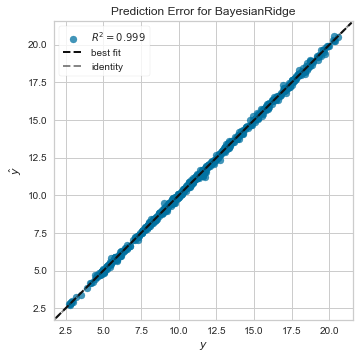

In [28]:
# Plotando gráfico de erro
plot_model(tune_br, plot='error')

Podemos observar no gráfico acima o ajuste do nosso modelo diante do conjunto de dados, indicando o R² de 0,999, mostrando que 99,9% dos dados estão bem ajustados ao modelo **Bayesian Ridge** após o *tunning*, o que é um sinal positivo para a funcionalidade do modelo.

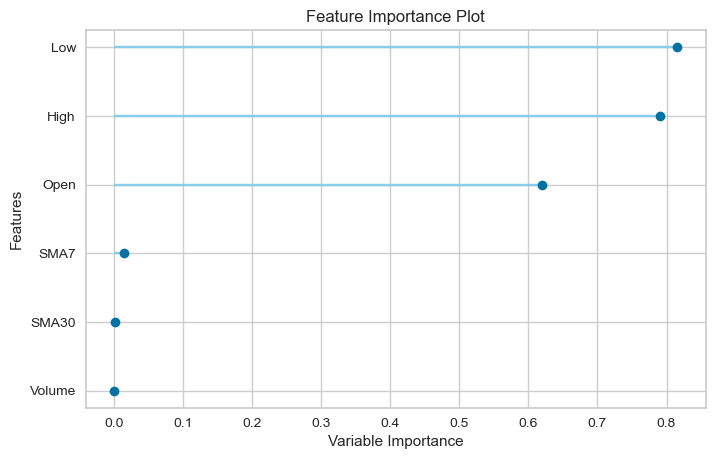

In [29]:
plot_model(tune_br, plot='feature') # feature melhor utilizada no modelo

No gráfico de *Feature Importance Plot*, podemos observar as variáveis organizadas pelo seu nível de importância para o modelo de previsão. Neste caso, observamos que o preço mínimo do dia tem sido a variável mais utilizada, enquanto o volume e a média móvel de 30 períodos não foram utilizadas pelo modelo.

## Testando o modelo com dados de treinamento

Iremos realizar um teste no modelo utilizando os dados de treinamento, para observar como as métricas de acurácia se comparam com os resultados atingidos anteriormente quando estávamos realizando o *tuning* do modelo Bayesian Ridge

In [30]:
# Testando com dados de treinamento para ver as métricas de acurácia
predict_model(tune_br)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Bayesian Ridge,0.0849,0.0125,0.1118,0.9993,0.0100,0.0083


,Open,High,Low,Volume,SMA7,SMA30,Close,Label
0,4.861416,4.861416,4.669681,44085700.0,4.880000,4.750000,4.700606,4.704719
1,7.697330,7.755335,7.482709,39540700.0,7.820000,8.270000,7.546515,7.568242
2,10.591805,10.644011,10.446792,22821900.0,10.700000,10.590000,10.527999,10.515177
3,17.077955,17.168692,16.967775,38201600.0,17.410000,17.799999,17.006662,17.061857
4,2.925508,2.950248,2.721403,100576600.0,2.970000,3.900000,2.727588,2.777303
...,...,...,...,...,...,...,...,...
655,2.783253,2.826548,2.721403,56031000.0,2.780000,3.010000,2.758513,2.766190
656,11.577898,11.925932,11.514093,41785200.0,11.180000,10.840000,11.769318,11.794829
657,5.028411,5.071706,4.576906,86084704.0,4.690000,3.380000,4.576906,4.690520
658,20.407734,20.707748,20.267727,48744700.0,20.040001,18.520000,20.574409,20.525423


Métricas ainda melhores!

## Finalizando o modelo e fazendo a previsão

In [31]:
# Finalizando o modelo e fazendo a previsão dos últimos 253 dias de pregão
final_br_model = finalize_model(tune_br)

In [33]:
# Prevendo os ultimos 253 dias
prev = predict_model(final_br_model, data = petr4_predict)
prev[['Close','Label']].round(2)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Bayesian Ridge,0.1521,0.0368,0.1919,0.9976,0.0078,0.0065


,Close,Label
0,18.81,18.82
1,19.21,19.18
2,19.64,19.55
3,19.50,19.38
4,19.75,19.64
...,...,...
248,30.06,30.11
249,30.02,30.22
250,29.76,29.71
251,30.28,30.16


## Plotando gráfico de preços de fechamento e de previsão dos últimos 253 dias

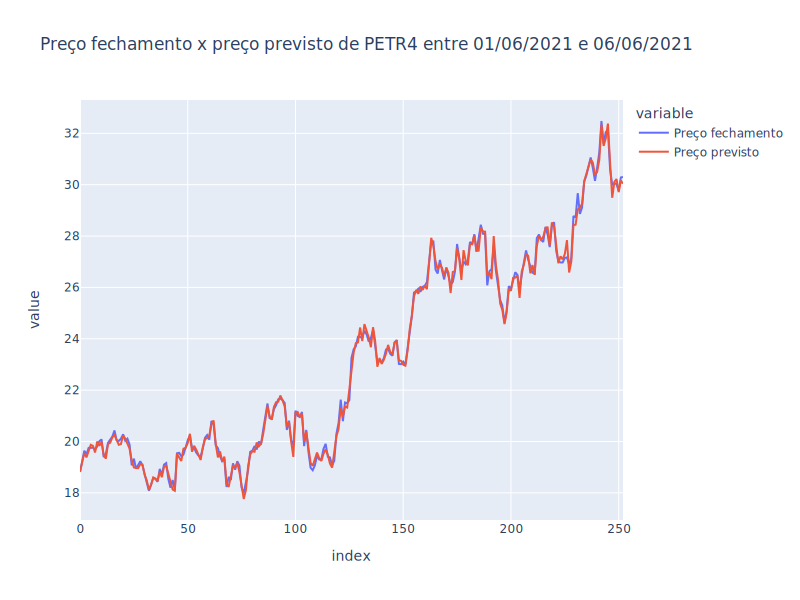

In [65]:
fig = px.line(round(prev[['Close','Label']], 2), 
              x = round(prev[['Close','Label']], 2).index, 
              y = ['Close','Label'],
             title = 'Preço fechamento x preço previsto de PETR4 entre 01/06/2021 e 06/06/2021',
             width = 800, height = 600)
newnames = {'Close':'Preço fechamento', 'Label': 'Preço previsto'}
fig.for_each_trace(lambda t: t.update(name = newnames[t.name],
                                      legendgroup = newnames[t.name],
                                      hovertemplate = t.hovertemplate.replace(t.name, newnames[t.name])
                                     )
                  )
fig.show()

## Conclusão<br>
Podemos observar que a biblioteca PyCaret oferece formas fáceis e simples, com pouquíssimas linhas de código, para testarmos diversos modelos diferentes de machine learning e vermos qual se adéqua melhor ao conjunto dos dados analisados.<br>
Neste estudo, foi possível atingir um modelo que se ajustou muito bem aos nossos dados e que foi capaz de prever os preços de fechamento dos últimos 253 dias de pregão de forma bastante satisfatória, sendo capaz de indicar a direção das ações da Petrobrás naquele período.<br>
Todos os dados e os procedimentos presentes neste *notebook* tem como única finalidade o estudo da biblioteca PyCaret e os modelos de machine learning utilizados, não sendo, de maneira nenhuma, indicação de compra ou venda de quaisquer ativos financeiros.